<a href="https://colab.research.google.com/github/nadhybrandao/Atividades_Praticas_WoMarkersCode/blob/main/WoMakersCode_Frequ%C3%AAncias_e_Medidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

Considerando a base de dados de enem_2023.json responda as questões
abaixo (os dados são fictícios).

Você é uma pesquisadora de um cursinho para estudantes que querem
ingressar na universidade em 2025. Seu objetivo é retirar informações da
base de dados do enem do ano anterior para alinhar melhor as estratégias do
cursinho para cada estudante.
O dado possui 6 colunas, 5 delas representam as disciplinas do ENEM e uma o
gênero das pessoas que fizeram a prova. No dado existe a representação de
1000 pessoas, sendo cada uma delas uma linha.

1. Qual das disciplinas tem a maior amplitude de nota?
2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se
de remover todos os valores nulos quando considerar a mediana)
3. Considerando o curso de Ciência da Computação da UFPE, onde o peso
cada uma das disciplinas ponderado:
* a. Redação - 2
* b. Matemática e suas Tecnologias - 4
* c. Linguagens, Códigos e suas Tecnologias - 2
* d. Ciências Humanas e suas Tecnologias - 1
* e. Ciências da Natureza e suas Tecnologias - 1

Qual o desvio padrão e média das notas dos 500 estudantes mais bem
colocados considerando esses pesos?
4. Se todos esses estudantes aplicassem para ciência da computação e
existem apenas 40 vagas, qual seria a variância e média da nota dos
estudantes que entraram no curso de ciência da computação?
5. Qual o valor do teto do terceiro quartil para as disciplinas de
matemática e linguagens?
6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos.
Podemos dizer que são histogramas simétricos, justifique e classifique
se não assimétricas?
7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma
opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])
8. Faça um boxplot do quartil de todas as disciplinas de ciências da
natureza e redação. É possível enxergar outliers? Utilize o método IQR.
9. Remova todos os outliers e verifique se eles são passíveis de alterar a
média nacional significativamente? (considere significativamente um
valor acima de 5%)
10. Considerando valores nulos, tente encontrar qual seria a melhor medida
de tendência que pode substituir as notas nulas. Média, moda ou
mediana? Substitua o valor por todos os três e diga qual delas altera
menos a média geral e o desvio padrão.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_json("enem_2023.json")
df.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


# Questão 1

In [ ]:
# Qual das disciplinas tem a maior amplitude de nota?
amplitude = df.max(numeric_only=True) - df.min(numeric_only=True)
maior_amplitude = amplitude.idxmax()
maior_amplitude_valor = amplitude.max()

print(f"A disciplina com a maior amplitude é {maior_amplitude} com amplitude de {maior_amplitude_valor:.2f}.")

A disciplina com a maior amplitude é Redação com amplitude de 729.16.


# Questão 2

In [ ]:
# Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se de remover todos os valores nulos quando considerar a mediana)
medias = df.mean(numeric_only=True)
medianas = df.median(numeric_only=True)

print("Médias:")
print(medias)
print("\nMedianias:")
print(medianas)

Médias:
Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64

Medianias:
Linguagens              515.045250
Ciências humanas        524.519920
Ciências da natureza    500.479263
Matemática              533.247767
Redação                 635.273973
dtype: float64


# Questão 3

In [ ]:
#Considerando o curso de Ciência da Computação da UFPE, onde o peso cada uma das disciplinas ponderado:
#a. Redação - 2
#b. Matemática e suas Tecnologias - 4
#c. Linguagens, Códigos e suas Tecnologias - 2
#d. Ciências Humanas e suas Tecnologias - 1
#e. Ciências da Natureza e suas Tecnologias - 1
# Qual o desvio padrão e média das notas dos 500 estudantes mais bem colocados considerando esses pesos?

pesos = {
    'Redação': 2,
    'Matemática': 4,
    'Linguagens': 2,
    'Ciências humanas': 1,
    'Ciências da natureza': 1
}

# Calculando a nota ponderada
df['nota_ponderada'] = (
    df['Redação'] * pesos['Redação'] +
    df['Matemática'] * pesos['Matemática'] +
    df['Linguagens'] * pesos['Linguagens'] +
    df['Ciências humanas'] * pesos['Ciências humanas'] +
    df['Ciências da natureza'] * pesos['Ciências da natureza']
) / sum(pesos.values())

# Selecionando os 500 melhores estudantes
top_500 = df.nlargest(500, 'nota_ponderada')

# Calculando a média e o desvio padrão dos 500 melhores
media_top_500 = top_500['nota_ponderada'].mean()
desvio_padrao_top_500 = top_500['nota_ponderada'].std()

print(f"Média: {media_top_500:.2f}")
print(f"Desvio padrão: {desvio_padrao_top_500:.2f}")

Média: 557.29
Desvio padrão: 40.44


# Questão 4

In [ ]:
# Se todos esses estudantes aplicassem para ciência da computação e existem apenas 40 vagas, qual seria a variância e média da nota dos estudantes que entraram no curso de ciência da computação?
top_40 = top_500.nlargest(40, 'nota_ponderada')

# Calculando a média e variância
media_top_40 = top_40['nota_ponderada'].mean()
variancia_top_40 = top_40['nota_ponderada'].var()

print(f"Média: {media_top_40:.2f}")
print(f"Variância: {variancia_top_40:.2f}")


Média: 636.68
Variância: 295.77


# Questão 5

In [ ]:
# Qual o valor do teto do terceiro quartil para as disciplinas de matemática e linguagens?
q3_matematica = df['Matemática'].quantile(0.75)
q3_linguagens = df['Linguagens'].quantile(0.75)

print(f"Teto do terceiro quartil para Matemática: {q3_matematica:.2f}")
print(f"Teto do terceiro quartil para Linguagens: {q3_linguagens:.2f}")


Teto do terceiro quartil para Matemática: 592.91
Teto do terceiro quartil para Linguagens: 571.64


# Questão 6

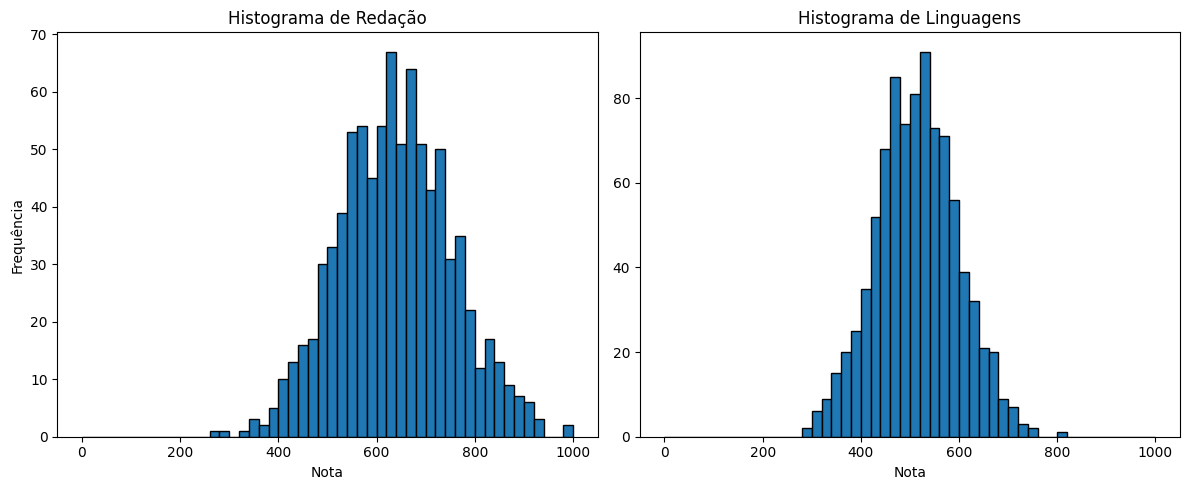

In [ ]:
# Faça o histograma de Redação e Linguagens, de 20 em 20 pontos. Podemos dizer que são histogramas simétricos, justifique e classifique se não assimétricas?
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Redação'].dropna(), bins=range(0, 1001, 20), edgecolor='black')
plt.title('Histograma de Redação')
plt.xlabel('Nota')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.hist(df['Linguagens'].dropna(), bins=range(0, 1001, 20), edgecolor='black')
plt.title('Histograma de Linguagens')
plt.xlabel('Nota')

plt.tight_layout()
plt.show()


# Questão 7

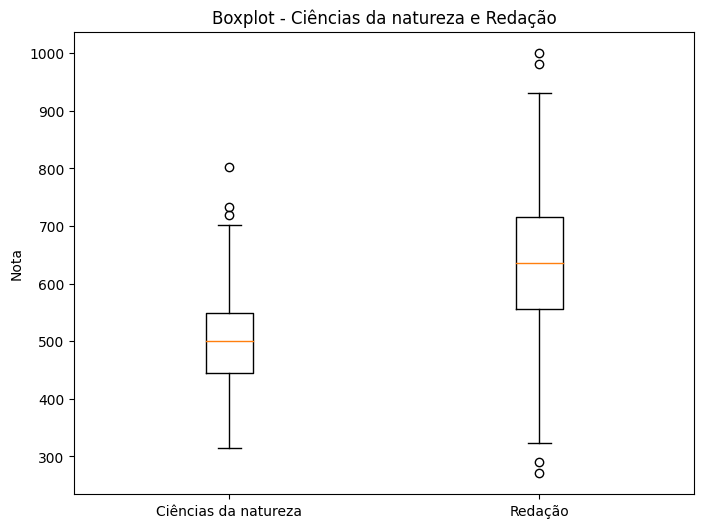

In [ ]:
# Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])
plt.figure(figsize=(8, 6))
plt.boxplot([df['Ciências da natureza'].dropna(), df['Redação'].dropna()],
            labels=['Ciências da natureza', 'Redação'])
plt.title('Boxplot - Ciências da natureza e Redação')
plt.ylabel('Nota')
plt.show()


# Questão 8

In [ ]:
# Faça um boxplot do quartil de todas as disciplinas de ciências da natureza e redação. É possível enxergar outliers? Utilize o método IQR.
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Removendo outliers das disciplinas
df_clean = remove_outliers(df, 'Ciências da natureza')
df_clean = remove_outliers(df_clean, 'Redação')

# Comparando médias antes e depois
media_antes = df['Redação'].mean()
media_depois = df_clean['Redação'].mean()

print(f"Média antes: {media_antes:.2f}, Média depois: {media_depois:.2f}")

# Verificando se a mudança é significativa (>5%)
mudanca_significativa = abs(media_antes - media_depois) / media_antes * 100 > 5
print(f"Mudança significativa? {'Sim' if mudanca_significativa else 'Não'}")


Média antes: 637.78, Média depois: 638.17
Mudança significativa? Não


# Questão 9

In [ ]:
# Função para remover outliers utilizando IQR
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Removendo outliers das disciplinas
df_clean = remove_outliers(df, 'Ciências da natureza')
df_clean = remove_outliers(df_clean, 'Redação')

# Comparando médias antes e depois
media_antes = df['Redação'].mean()
media_depois = df_clean['Redação'].mean()

print(f"Média antes: {media_antes:.2f}, Média depois: {media_depois:.2f}")

# Verificando se a mudança é significativa (>5%)
mudanca_significativa = abs(media_antes - media_depois) / media_antes * 100 > 5
print(f"Mudança significativa? {'Sim' if mudanca_significativa else 'Não'}")


Média antes: 637.78, Média depois: 638.17
Mudança significativa? Não


# Questão 10

In [ ]:
# Remova todos os outliers e verifique se eles são passíveis de alterar a média nacional significativamente? (considere significativamente um valor acima de 5%)
def substituir_nulos_e_impacto(df, col):
    media = df[col].mean()
    mediana = df[col].median()
    moda = df[col].mode()[0]

    df_media = df[col].fillna(media)
    df_mediana = df[col].fillna(mediana)
    df_moda = df[col].fillna(moda)

    impacto_media = abs(df[col].mean() - df_media.mean())
    impacto_mediana = abs(df[col].mean() - df_mediana.mean())
    impacto_moda = abs(df[col].mean() - df_moda.mean())

    print(f"Impacto na média para {col}:")
    print(f"Substituindo por média: {impacto_media:.2f}")
    print(f"Substituindo por mediana: {impacto_mediana:.2f}")
    print(f"Substituindo por moda: {impacto_moda:.2f}")

substituir_nulos_e_impacto(df, 'Redação')


Impacto na média para Redação:
Substituindo por média: 0.00
Substituindo por mediana: 0.35
Substituindo por moda: 51.37
